# Importing Required Libraries

In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [3]:
import pandas as pd
df=pd.read_csv('Ratings.csv') 
df  #Checking the dataset

,Unnamed: 0,Product_Review,Ratings
0,0,Worth to buy if your are comfortable with one ...,5.0
1,1,Cons-Worst call quality voice sounds robotic a...,2.0
2,2,Nice pair of True wireless stereo earphones fr...,5.0
3,3,These are my first TWS earbuds. Before this I ...,4.0
4,4,Honestly to say this was my first buds and it ...,1.0
...,...,...,...
36395,36395,"I purchased it for my Mother, Decent product i...",4.0
36396,36396,Battery is getting drained out quite fast. 7% ...,1.0
36397,36397,"Not as good as redmi 8a, no type C , no fast c...",3.0
36398,36398,Worst phone.. overall performance is just bakw...,5.0


In [4]:
#We can see that Unnamed:0 is just the index number.lets drop that column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape    #Checking the dimensions of the dataset

(36400, 2)

# Dataset Description

# Ratings Prediction

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

# Data Collection Phase:
    
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. More the data better the model In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, monitors, Home theater, router from different e-commerce websites. Basically, we need these columns-

1) reviews of the product.

2) rating of the product.

You can fetch other data as well, if you think data can be useful or can help in the project. It completely depends on your imagination or assumption.

Hint: – Try fetching data from different websites. If data is from different websites, it will help our model to remove the effect of over fitting.

-> Try to fetch an equal number of reviews for each rating, for example if you are fetching 10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.

-> Convert all the ratings to their round number, as there are only 5 options for rating i.e., 1,2,3,4,5. If a rating is 4.5 convert it 5.

# Model Building Phase:

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like-



#Data Cleaning

#Exploratory Data Analysis

#Data Preprocessing

#Model Building

#Model Evaluation

#Selecting the best model

# Data pre-processing

In [7]:
#Checking for null values 
df.isnull().sum()

Product_Review    80
Ratings            0
dtype: int64

In [8]:
#We can handle missing data by filling them with 'No Review' using fillna()
df['Product_Review'].fillna('No review',inplace=True)

In [9]:
df.isnull().sum()  #Checking after filling them

Product_Review    0
Ratings           0
dtype: int64

In [10]:
df.info()   #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  36400 non-null  object 
 1   Ratings         36400 non-null  float64
dtypes: float64(1), object(1)
memory usage: 568.9+ KB


In [11]:
#Checking the average rating given by the users
avg = df['Ratings'].mean()
Avg = round(avg,1)
print("Average rating given by users is " + str(Avg))

Average rating given by users is 3.3


In [12]:
#Checking the value counts of the rating
df['Ratings'].value_counts()

5.0    13865
1.0    11115
4.0     6200
3.0     3040
2.0     2180
Name: Ratings, dtype: int64

# Data Visualization

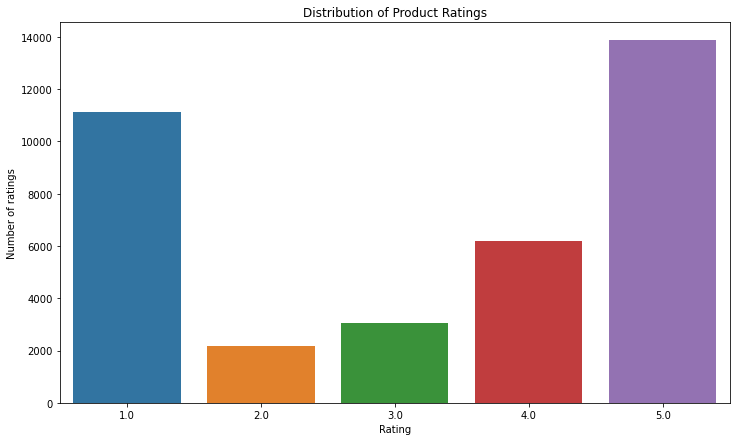

In [13]:
f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['Ratings'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

Observations-:
1.5 has been given the maximum ratings by the users, followed by 1, 4, 3 and 2

# Preprocessing using NLP for Sentiment analysis

The steps involved are:

1.Removing Punctuations and other special characters

2.Splitting the comments into individual words

3.Removing Stop Words

4.Stemming and Lemmatising

5.Applying Count Vectoriser

6.Splitting dataset into Training and Testing

In [15]:
#Importing required libraries
import re # for regex
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stead\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [22]:
#Calling the class
clean_text(df, 'Product_Review')
df['Product_Review'].tail(3)

36397    good redmi numbra type c fast charge sound low...
36398    worst phone overall performance bakwaz buy alw...
36399    covid numbr drastically changed everything loo...
Name: Product_Review, dtype: object

In [23]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[worth, buy, comfortable, one, kidney]",5.0
1,"[cons, worst, call, quality, voice, sounds, ro...",2.0
2,"[nice, pair, true, wireless, stereo, earphones...",5.0
3,"[first, tws, earbuds, using, oneplus, bullets,...",4.0
4,"[honestly, say, first, buds, comes, surprise, ...",1.0


In [25]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stead\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [28]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

36400


[['worth', 'buy', 'comfort', 'one', 'kidney'],
 ['con',
  'worst',
  'call',
  'qualiti',
  'voic',
  'sound',
  'robot',
  'end',
  'lot',
  'background',
  'disturbancecal',
  'audio',
  'qualiti',
  'better',
  'use',
  'singl',
  'budat',
  'time',
  'doubl',
  'tap',
  'work',
  'properlypro',
  'numbr',
  'hrs',
  'usag',
  'singl',
  'chargebass',
  'vocal',
  'good',
  'listen',
  'musicswitch',
  'devic',
  'easi',
  'good',
  'connect'],
 ['nice',
  'pair',
  'true',
  'wireless',
  'stereo',
  'earphon',
  'oneplus',
  'build',
  'qualiti',
  'great',
  'function',
  'accept',
  'work',
  'great',
  'one',
  'plus',
  'nord',
  'oneplus',
  'numbr',
  'numbrpro',
  'appl',
  'airpod',
  'much',
  'better',
  'one',
  'consid',
  'price',
  'worth',
  'buy']]

In [29]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,clean_review
0,"[worth, buy, comfortable, one, kidney]",5.0,"[worth, buy, comfort, one, kidney]"
1,"[cons, worst, call, quality, voice, sounds, ro...",2.0,"[con, worst, call, qualiti, voic, sound, robot..."
2,"[nice, pair, true, wireless, stereo, earphones...",5.0,"[nice, pair, true, wireless, stereo, earphon, ..."
3,"[first, tws, earbuds, using, oneplus, bullets,...",4.0,"[first, tws, earbud, use, oneplus, bullet, wir..."
4,"[honestly, say, first, buds, comes, surprise, ...",1.0,"[honest, say, first, bud, come, surpris, numbr..."


In [30]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,worth buy comfort one kidney,5.0,"[worth, buy, comfort, one, kidney]"
1,con worst call qualiti voic sound robot end lo...,2.0,"[con, worst, call, qualiti, voic, sound, robot..."
2,nice pair true wireless stereo earphon oneplus...,5.0,"[nice, pair, true, wireless, stereo, earphon, ..."
3,first tws earbud use oneplus bullet wireless e...,4.0,"[first, tws, earbud, use, oneplus, bullet, wir..."
4,honest say first bud come surpris numbr fit pr...,1.0,"[honest, say, first, bud, come, surpris, numbr..."


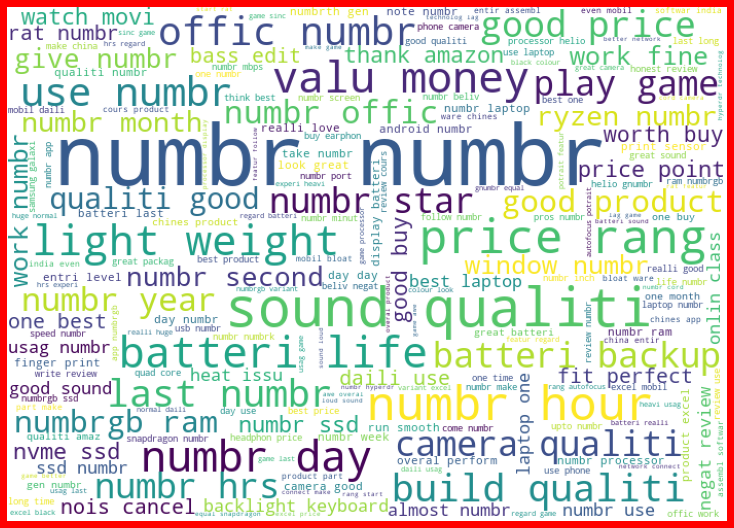

In [32]:
#Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

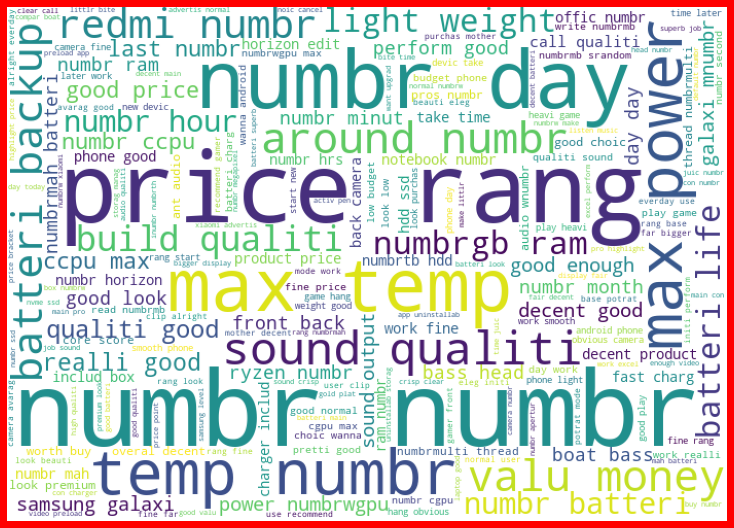

In [33]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

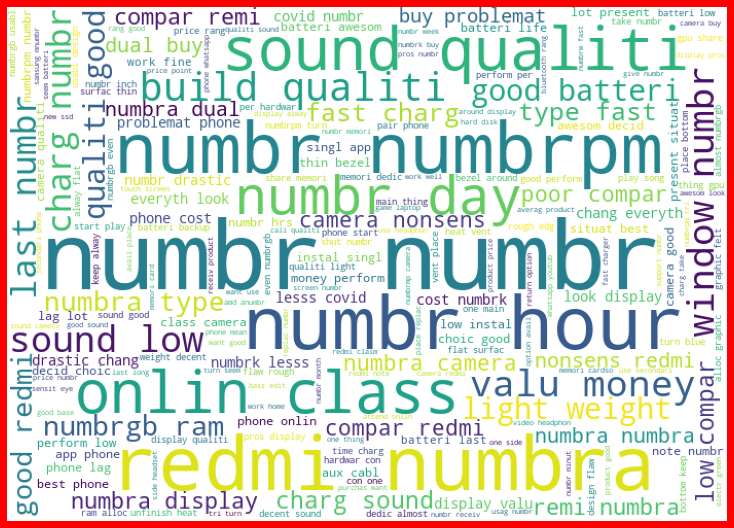

In [34]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

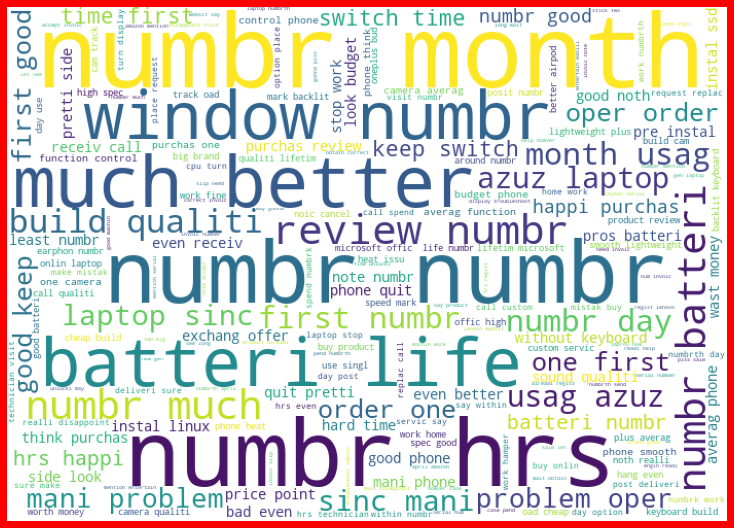

In [35]:
#Getting sense of words in Rating 2
one = df['Product_Review'][df['Ratings']==2.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

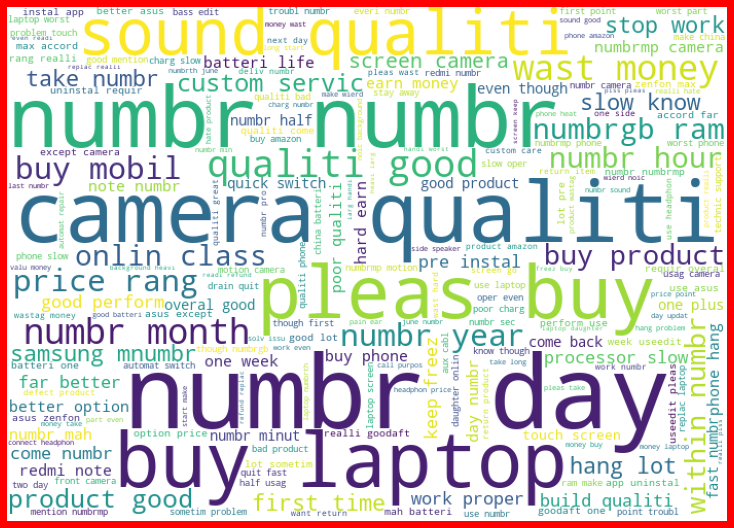

In [36]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Observations-:
    
1.The enlarged texts are the most number of words used there and small texts are the less number of words used.

2.It varies according to the ratings.

# Feature Extraction

In [38]:
#Converting text into numeric using TfidfVectorizer
#create object
tf = TfidfVectorizer()

#fitting 
features = tf.fit_transform(df['Product_Review'])
x=features
y=df[['Ratings']]

x.shape




(36400, 2927)

In [39]:
y.shape

(36400, 1)

# Model building

In [40]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [42]:
LR=LogisticRegression()
max_acc_score(LR,x,y)

The accuracy score at r_state 42 is 0.890934065934066
The accuracy score at r_state 43 is 0.8968406593406594
The accuracy score at r_state 44 is 0.8880494505494505
The accuracy score at r_state 45 is 0.8894230769230769
The accuracy score at r_state 46 is 0.8895604395604395
The accuracy score at r_state 47 is 0.8961538461538462
The accuracy score at r_state 48 is 0.8822802197802198
The accuracy score at r_state 49 is 0.8877747252747252
The accuracy score at r_state 50 is 0.8865384615384615
The accuracy score at r_state 51 is 0.8912087912087913
The accuracy score at r_state 52 is 0.8829670329670329
The accuracy score at r_state 53 is 0.8953296703296704
The accuracy score at r_state 54 is 0.8951923076923077
The accuracy score at r_state 55 is 0.8927197802197803
The accuracy score at r_state 56 is 0.8971153846153846
The accuracy score at r_state 57 is 0.895467032967033
The accuracy score at r_state 58 is 0.8903846153846153
The accuracy score at r_state 59 is 0.8864010989010989
The accuracy

0.8971153846153846

In [43]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.20)

# Finding best model

In [44]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [46]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [47]:
#Importing required modules and metrices
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [48]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.8971153846153846


cross_val_score:  0.5996703296703296


Classification report:
 
              precision    recall  f1-score   support

         1.0       0.89      0.92      0.90      2286
         2.0       0.98      0.85      0.91       425
         3.0       0.87      0.86      0.87       606
         4.0       0.87      0.84      0.85      1186
         5.0       0.91      0.92      0.91      2777

    accuracy                           0.90      7280
   macro avg       0.90      0.88      0.89      7280
weighted avg       0.90      0.90      0.90      7280



Confusion matrix: 

[[2099    1   17   63  106]
 [  14  361   20    6   24]
 [  53    1  524   13   15]
 [  45    6   30 1000  105]
 [ 146    0   12   72 2547]]




****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.8723901098901099


cross_v

In [49]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,89.711538,59.967033
1,MultinomialNB,87.239011,57.736264
2,DecisionTreeClassifier,90.439560,52.329670
3,KNeighborsClassifier,88.337912,50.505495
4,RandomForestClassifier,90.439560,64.656593
5,AdaBoostClassifier,54.258242,44.609890
6,GradientBoostingClassifier,88.997253,59.222527


We can see that Random Forest and Gradient Boosting and Logistic Regression algorithms are performing well. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

# Hyperparameter Tuning

In [50]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=76)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

{'n_estimators': 100}
0.8946085551525415


In [51]:
#Using the best parameters obtained
rfc=RandomForestClassifier(random_state=56,n_estimators=100)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rfc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  90.4532967032967
Cross validation score:  57.6978721718759
Classification report: 

              precision    recall  f1-score   support

         1.0       0.90      0.94      0.92      2286
         2.0       0.96      0.86      0.91       425
         3.0       0.88      0.86      0.87       606
         4.0       0.88      0.86      0.87      1186
         5.0       0.92      0.91      0.92      2777

    accuracy                           0.90      7280
   macro avg       0.91      0.89      0.90      7280
weighted avg       0.90      0.90      0.90      7280

Confusion matrix: 

[[2140    1   17   36   92]
 [  14  366   15    6   24]
 [  54    5  520   17   10]
 [  28   10   26 1024   98]
 [ 148    0   12   82 2535]]


In [52]:
#GradientBoostingClassifier
parameters={'n_estimators':[1,10,100]}

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier(random_state=76)   #Using the best random state we obtained
gbc=GridSearchCV(gbc,parameters,cv=3,scoring='accuracy')
gbc.fit(x_train,y_train)
print(gbc.best_params_)     #Printing the best parameters obtained
print(gbc.best_score_)      #Mean cross-validated score of best_estimator

{'n_estimators': 100}
0.8836195252684691


In [53]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=56,n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  88.99725274725274
Cross validation score:  49.65669627427923
Classification report: 

              precision    recall  f1-score   support

         1.0       0.89      0.90      0.90      2286
         2.0       0.98      0.85      0.91       425
         3.0       0.91      0.85      0.88       606
         4.0       0.94      0.81      0.87      1186
         5.0       0.86      0.93      0.89      2777

    accuracy                           0.89      7280
   macro avg       0.92      0.87      0.89      7280
weighted avg       0.89      0.89      0.89      7280

Confusion matrix: 

[[2059    1   17   19  190]
 [  15  361    5    2   42]
 [  50    1  514    3   38]
 [  44    6   16  958  162]
 [ 139    0   12   39 2587]]


# Finalizing the model

In [54]:
rfc_prediction=rfc.predict(x)

#Making a dataframe of predictions
rating_prediction=pd.DataFrame({'Predictions':rfc_prediction})
rating_prediction

,Predictions
0,5.0
1,2.0
2,5.0
3,4.0
4,1.0
...,...
36395,4.0
36396,1.0
36397,3.0
36398,5.0


# Saving the model

In [55]:
#Saving the model
import pickle
filename='RatingsPrediction_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))

In [56]:
#Saving predicted values
rating_prediction.to_csv('RatingsPredictionResults.csv')

# Summary

In [ ]:
After the completion of this project, we got an insight of how to collect data, preprocessing the data, analyzing the data and building a model.

1.we collected the reviews and ratings data from e-commerce website Amazon it was done by using Webscraping. The framework used for webscraping was Selenium, which has an advantage of automating our process of collecting data.

2.We collected almost 36000+ of data which contained the ratings from 1.0 to 5.0 and their reviews.

3.en, the scrapped data was combined in a single dataframe and saved in a csv file so that we can open it and analyze the data.

4.We did the preprocessing using NLP and the steps are as follows:

a.Removing Punctuations and other special characters

b.Splitting the comments into individual words

c.Removing Stop Words

d.Stemming and Lemmatising

e.Applying Count Vectoriser

f.Splitting dataset into Training and Testing

5.After separating our train and test data, we started running different machine learning classification algorithms to find out the best performing model.

6.We found that RandomForest and GradienBoosting Algorithms and Logistic Regression were performing well, according to their accuracy and cross val scores.

7.Then, we performed Hyperparameter Tuning techniques using GridSearchCV for getting the best parameters and improving the scores. In that, RandomForestClassifier performed well and we finalised that model.

8.We saved the model in pkl format and then saved the predicted values in a csv format.

9.The problems we faced during this project were:

a.More time consumption during hyperparameter tuning for both models, as the data was large.

b.Less number of parameters were used during tuning.

c.Scrapping of data from different websites were of different process and the length of data were differing in most cases so I sticked to Amazon and Scrapped data which are famousin the site.

d.Some of the reviews were bad and the text had more wrong information about the product.

e.WordCloud was not showing proper text which had more positive and negative weightage.

10.Areas of improvement:

a.Less time complexity

b.More accurate reviews can be given

c.Less errors can be avoided.